1. Construa um modelo para a base de dados Statlog Heart Dataset.

2. Avalie o modelo separadamente para pessoas do sexo masculino e pessoas do sexo feminino. 

3. Avalie se houve diferença entre as taxas de verdadeiros positivos e falsos positivos para os dois estratos da população. 

Obs.: Leia os slides sobre equidade e verifique qual o tipo de comportamento injusto do modelo.

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do dataset
df = pd.read_csv('Data\statlog-heart\statlog.csv', header=0, names=[
    'Age', 'Sex', 'Chp', 'Bp', 'Sch', 'Fbs', 'Ecg', 'Mhrt', 'Exian', 'Opk', 'Slope', 'Vessel', 'Thal', 'Class'
])


# Conversão dos dados para float
df = df.astype(float)

df.head()

,Age,Sex,Chp,Bp,Sch,Fbs,Ecg,Mhrt,Exian,Opk,Slope,Vessel,Thal,Class
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1.0


In [162]:
# Separação das features (X) e do target (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [163]:
positive_count = df[df['Class'] == 1].groupby('Sex').size()
negative_count = df[df['Class'] == 2].groupby('Sex').size()

print("Number of positive instances by gender:")
print("Male:", positive_count[1])
print("Female:", positive_count[0])

print("\nNumber of negative instances by gender:")
print("Male:", negative_count[1])
print("Female:", negative_count[0])

Number of positive instances by gender:
Male: 83
Female: 67

Number of negative instances by gender:
Male: 100
Female: 20


In [164]:
# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [165]:
# Treinamento do modelo de regressão logística
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [166]:
# Predição no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação geral do modelo
print("Avaliação Geral do Modelo:")
print(classification_report(y_test, y_pred))

Avaliação Geral do Modelo:
              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84        48
         2.0       0.76      0.79      0.78        33

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.82      0.81      0.82        81



In [167]:
# Função para avaliar o modelo por sexo
def evaluate_by_sex(X, y, model, sex_value):
    # Filtrar os dados pelo sexo especificado
    X_sex = X[X['Sex'] == sex_value]  # Assumindo que 'Sex' é a segunda coluna (índice 1)
    y_sex = y[X['Sex'] == sex_value]
    # Fazer predições
    y_sex_pred = model.predict(X_sex)
    
    # Avaliar o modelo
    print(f"\nAvaliação do Modelo para {'Homens' if sex_value == 1 else 'Mulheres'}:")
    print(classification_report(y_sex, y_sex_pred))
    
    # Calcular a matriz de confusão
    cm = confusion_matrix(y_sex, y_sex_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Retornar as taxas de verdadeiros positivos e falsos positivos, e a matriz de confusão
    return tp / (tp + fn), fp / (fp + tn), cm


Avaliação Geral do Modelo:
              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84        48
         2.0       0.76      0.79      0.78        33

    accuracy                           0.81        81
   macro avg       0.81      0.81      0.81        81
weighted avg       0.82      0.81      0.82        81


Matriz de Confusão:


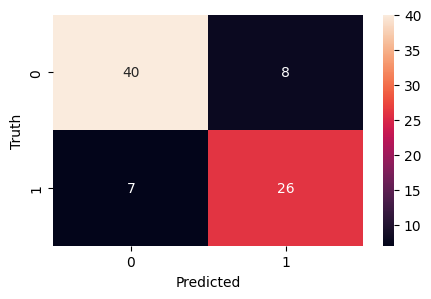

In [168]:
# Avaliação geral do modelo
y_pred = model.predict(X_test)
print("Avaliação Geral do Modelo:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Avaliação do Modelo para Homens:
              precision    recall  f1-score   support

         1.0       0.74      0.74      0.74        27
         2.0       0.74      0.74      0.74        27

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



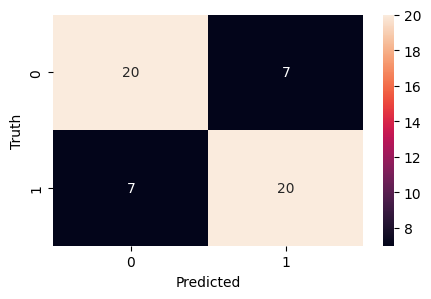

In [169]:
# Avaliação para homens
tp_rate_male, fp_rate_male, cm_male = evaluate_by_sex(X_test, y_test, model, 1)

# plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_male, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Avaliação do Modelo para Mulheres:
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.98        21
         2.0       0.86      1.00      0.92         6

    accuracy                           0.96        27
   macro avg       0.93      0.98      0.95        27
weighted avg       0.97      0.96      0.96        27



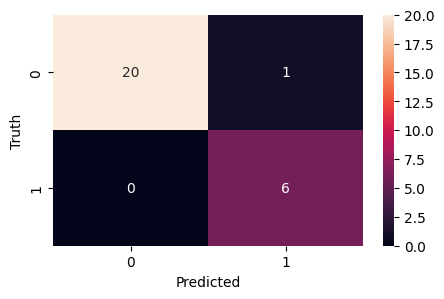

In [170]:
# Avaliação para mulheres
tp_rate_female, fp_rate_female, cm_female = evaluate_by_sex(X_test, y_test, model, 0)
# plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm_female, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [171]:
# Diferença entre taxas de verdadeiros positivos e falsos positivos
print("\nDiferença entre taxas de verdadeiros positivos e falsos positivos:")
print(f"Taxa de Verdadeiros Positivos para Homens: {tp_rate_male}")
print(f"Taxa de Verdadeiros Positivos para Mulheres: {tp_rate_female}")
print(f"Taxa de Falsos Positivos para Homens: {fp_rate_male}")
print(f"Taxa de Falsos Positivos para Mulheres: {fp_rate_female}")


Diferença entre taxas de verdadeiros positivos e falsos positivos:
Taxa de Verdadeiros Positivos para Homens: 0.7407407407407407
Taxa de Verdadeiros Positivos para Mulheres: 1.0
Taxa de Falsos Positivos para Homens: 0.25925925925925924
Taxa de Falsos Positivos para Mulheres: 0.047619047619047616


Os resultados da análise mostram que o modelo tem um desempenho diferenciado entre homens e mulheres. Especificamente, a taxa de verdadeiros positivos (TPR) é 0.7407 para homens e 1.0 para mulheres, indicando que o modelo é mais eficiente na identificação correta de mulheres, mas não tão eficaz para homens. Além disso, a taxa de falsos positivos (FPR) é 0.2593 para homens e 0.0476 para mulheres, o que significa que o modelo é mais propenso a classificar erroneamente homens sem a condição como doentes em comparação com mulheres. Esses resultados sugerem que o modelo apresenta um viés a favor das mulheres em termos de diagnósticos corretos e incorretos, o que pode levar a diagnósticos excessivos para homens e subdiagnósticos para mulheres.

Vale observar que mulheres são o grupo minoritário da base, portanto o resultado apresentado por ter viés em si, visto que existe a possibilidade do grupo menor de mulheres apresentar casos mais simples que o modelo conseguiu identificar, causando a falsa ilusão de que o modelo erra mais para o conjunto de homens.;